<h2><i>kiara</i>: Network Analysis</h2>

Welcome back! Now that we're comfortable with what <i>kiara</i> looks like and what it can do to help track your data and your research process, let's try out some of the digital analysis tools, starting with <b>Network Analysis</b>.

<h2>Why Network Analysis?</h2>

Network Analysis offers a computational and quantitative means to examine and explore relational objects, with proxies to measure structural roles and concepts such as power and influence. Doing so digitally - and at scale - also allows us to consider these kinds of questions with large amounts of material or documents that was not  heretofore manageable with qualitative or manual approaches.

We won't get into any core network theories or its uses in the humanities here, as we're focused on the ways in which network analysis in <i>kiara</i> offers an interesting way to wrap the research process, and think about the decisions we're making and how to trace them. If you're interested in learning more about network analysis, or how to code using <a href="https://networkx.org">NetworkX</a>, the library currently used in these <i>kiara</i> modules, check out our recommended reading at the bottom.

<h3>Getting Started</h3>
<br>Let's start by double checking that we have all the required plugins and setting up an API for us to use <i>kiara</i>. We'll do this all in one go this time, but if you're unsure, feel free to head back to the <a href="http://dharpa.org/kiara.documentation/latest/workshop/workshop/">installation notebook</a> to look over this section again.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from kiara.api import KiaraAPI
kiara = KiaraAPI.instance()

Great, we're all set up. We're going to import some data again like in the first notebook, but this time we're going to use a local file, using the kiara function `import.local.file`. We're using sample data again here, but you can also use this function to import your own data in the future. 

The data we're using here is a sample taken from the <b>Circulation of Knowledge and Learned Practices in the 17th-century Dutch Republic (CKCC)</b> dataset collated by the Huygens Institute in the Netherlands and available on the 'LetterSampo' portal created by the Reassembling the Republic of Letters project team. For more on these projects see <a href="https://seco.cs.aalto.fi/projects/rrl/">here</a>.

The CKCC collection features around 20,000 letters written by and to 17th century scholars in the Dutch republic. Using quantitative network analysis on this dataset might offer insights into the most prolific writer in the dataset, which actor connected the most people, or who operated in closely knit writing groups. Although we can also use network analysis to explore or 'map' our datasets if we don't know much about them, in this notebook the research questions and module parameters have been built around and defined by the information we already have about the data. It's important that we acknowledge this now as a core factor in the decisions already made for this process, but we'll also return to this throughout the notebook.

Let's use the <i>kiara</i> function `import.local.file` then to access our datset, specifying the path to the csv file in our <span style="color:green">inputs</span> and saving the <span style="color:red">outputs</span> of the function as '<b>CKCC</b>'. Here we're defining the path simply as the file name, because we've stored the file in the same folder as this jupyter notebook. If it's stored somewhere else, we need to specify the full file path, or we can use the `download.file` module used in the <b>Hello Kiara</b> notebook.

Great, we're all set up. We're going to import some data again like in the first notebook, but this time we're going to use a local file, using the kiara function `import.local.file`. We're using sample data again here, but you can also use this function to import your own data in the future. 

The data we're using here is a sample taken from the <b>Circulation of Knowledge and Learned Practices in the 17th-century Dutch Republic (CKCC)</b> dataset collated by the Huygens Institute in the Netherlands and available on the 'LetterSampo' portal created by the Reassembling the Republic of Letters project team. For more on these projects see <a href="https://seco.cs.aalto.fi/projects/rrl/">here</a>.

The CKCC collection features around 20,000 letters written by and to 17th century scholars in the Dutch republic. Using quantitative network analysis on this dataset might offer insights into the most prolific writer in the dataset, which actor connected the most people, or who operated in closely knit writing groups. Although we can also use network analysis to explore or 'map' our datasets if we don't know much about them, in this notebook the research questions and module parameters have been built around and defined by the information we already have about the data. It's important that we acknowledge this now as a core factor in the decisions already made for this process, but we'll also return to this throughout the notebook.

Let's use the <i>kiara</i> function `import.local.file` then to access our datset, specifying the path to the csv file in our <span style="color:green">inputs</span> and saving the <span style="color:red">outputs</span> of the function as '<b>CKCC</b>'. Here we're defining the path simply as the file name, because we've stored the file in the same folder as this jupyter notebook. If it's stored somewhere else, we need to specify the full file path, or we can use the `download.file` module used in the <b>Hello Kiara</b> notebook.

In [2]:
CKCC = kiara.run_job('import.local.file', inputs={'path':'CKCC.csv'})
CKCC

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field   value                                                                                                                          │
│  ──────────────────────────────────────────────────────────────────────────────────                                                      │
│   file    Source,Target                                                                                                                  │
│           "Charas, Moyse, 1619-1698","Huygens, Christiaan, 1629-1695"                                                                    │
│           "Hartzwich, Peter, fl. 1632","Groot, Hugo de, 1583-1645"                                                                       │
│           "Heinsius, Daniel, 1580-1655","Groot, Hugo de, 1583-1645"                                                                      │
│           "Heinsius, Daniel, 1580-1655","Groot, Hugo de, 1583-1645"                                                                      │
│           "Heinsius, Daniel, 1580-1655","Groot, Hugo de, 1583-1645"                                                                      │
│           "Heinsius, Daniel, 1580-1655","Groot, Hugo de, 1583-1645"                                                                      │
│           "Heinsius, Daniel, 1580-1655","Groot, Hugo de, 1583-1645"                                                                      │
│           "Heinsius, Daniel, 1580-1655","Groot, Hugo de, 1583-1645"                                                                      │
│           "Heinsius, Daniel, 1580-1655","Groot, Hugo de, 1583-1645"                                                                      │
│           "Heinsius, Daniel, 1580-1655","Groot, Hugo de, 1583-1645"                                                                      │
│           "Heinsius, Daniel, 1580-1655","Groot, Hugo de, 1583-1645"                                                                      │
│           "Heinsius, Daniel, 1580-1655","Groot, Hugo de, 1583-1645"                                                                      │
│           "Heinsius, Daniel, 1580-1655","Huygens, Constantijn, 1596-1687"                                                                │
│           "Heinsius, Daniel, 1580-1655","Huygens, Constantijn, 1596-1687"                                                                │
│           "Heinsius, Nicolaas, 1620-1681","Huygens, Christiaan, 1629-1695"                                                               │
│           "Heinsius, Nicolaas, 1620-1681","Dati, Carlo Roberto, 1619-1676"                                                               │
│           "Heinsius, Nicolaas, 1620-1681","Dati, Carlo Roberto, 1619-1676"                                                               │
│           "Heinsius, Nicolaas, 1620-1681","Boulliau, Ismaël, 1605-1694"                                                                  │
│           "Heinsius, Nicolaas, 1620-1681","Boulliau, Ismaël, 1605-1694"                                                                  │
│           "Heinsius, Nicolaas, 1620-1681","Dati, Carlo Roberto, 1619-1676"                                                               │
│           "Heinsius, Nicolaas, 1620-1681","Dati, Carlo Roberto, 1619-1676"                                                               │
│           "Heinsius, Nicolaas, 1620-1681","Dati, Carlo Roberto, 1619-1676"                                                               │
│           "Heinsius, Nicolaas, 1620-1681","Dati, Carlo Roberto, 1619-1676"                                                               │
│           "Heinsius, Nicolaas, 1620-1681","Gronovi

<h2>Creating a Network</h2>

Time to make our network from this data. Let's have another look at the <i>kiara</i> modules to find something that will allow us to build a network. 

In [4]:
kiara.list_operation_ids()

['assemble.network_data.from.files',
 'assemble.network_data.from.tables',
 'compute.modularity_group',
 'create.betweenness_rank_list',
 'create.closeness_rank_list',
 'create.cut_point_list',
 'create.database.from.file',
 'create.database.from.file_bundle',
 'create.database.from.table',
 'create.degree_rank_list',
 'create.eigenvector_rank_list',
 'create.network_data.from.file',
 'create.stopwords_list',
 'create.table.from.file',
 'create.table.from.file_bundle',
 'date.check_range',
 'date.extract_from_string',
 'download.file',
 'download.file_bundle',
 'export.file.as.file',
 'export.network_data.as.csv_files',
 'export.network_data.as.graphml_file',
 'export.network_data.as.sql_dump',
 'export.network_data.as.sqlite_db',
 'export.table.as.csv_file',
 'extract.date_array.from.table',
 'file_bundle.pick.file',
 'file_bundle.pick.sub_folder',
 'generate.LDA.for.tokens_array',
 'import.database.from.local_file_path',
 'import.file',
 'import.file_bundle',
 'import.local.file',
 '

The top one looks great. Let's have a look what we need with the function `assemble.network_data.from.tables` using `kiara.retrieve_operation_info` once more.

In [5]:
kiara.retrieve_operation_info('assemble.network_data.from.tables')

Author(s)                                                                                                                                  
                     Lena Jaskov         helena.jaskov@uni.lu                                                                               
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         network_analysis                                                                                          
                     Labels       package: kiara_plugin.network_analysis                                                                    
                     References   source_repo: ]8;id=602950;https://github.com/DHARPA-Project/kiara_plugin.network_analysis\https://github.com/DHARPA-Project/kiara_plugin.network_analysis]8;;\                              
                                  documentation: ]8;id=456141;https://DHARPA-Project.github.io/kiara_plugin.network_analysis/\https://DHARPA-Project.github.io/kiara_plugin.network_analysis/]8;;\                            
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Create a network_data instance from one or two tables.                                                 
                                                                                                                                            
                                     This module needs at least one table as input, providing the edges of the resulting network data       
                                     set.                                                                                                   
                                     If no further table is created, basic node information will be automatically created by using unique   
                                     values from                                                                                            
                                     the edges source and target columns.                                                                   
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name           type     description                            Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       edges                table    A table that contains the edges        yes        -- no default --     
                                                                     data.                                                                  
                                       source_column_name   string   The name of the source column name     no         source               
                                                                     in the edges table.                                                    
                                       target_column_name   string   The name of the target column name     no         target               
                      

Like other network analysis tools, <i>kiara</i> first needs the data as an edge table. This means we first have to transform the csv file we imported earlier into a table before we can create the network data. Let's start by using the `create.table.from.file` function that we used in the first notebook and storing this as our <b>edges</b>, then use this to create our network data using the `assemble.network_data.from.tables` that we just read about. In this, we are defining two different sets of <span style="color:green">inputs</span>, overriding the first variable once we have used it to create our table.

If we want, we can also import a separate table with the nodes in, but this is optional, and for the moment let's stick with just the edge table. We'll store this again at the end in the variable <b>CKCC</b> for us to use again in a bit.

First check the <span style="color:green">inputs</span> requirements for the `create.table.from.file` function, just to be sure:

In [6]:
kiara.retrieve_operation_info('create.table.from.file')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         tabular                                                                                                   
                     Labels       package: kiara_plugin.tabular                                                                             
                     References   source_repo: ]8;id=874151;https://github.com/DHARPA-Project/kiara_plugin.tabular\https://github.com/DHARPA-Project/kiara_plugin.tabular]8;;\                                       
                                  documentation: ]8;id=618714;https://DHARPA-Project.github.io/kiara_plugin.tabular/\https://DHARPA-Project.github.io/kiara_plugin.tabular/]8;;\                                     
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Create a table from a file, trying to auto-determine the format of said file.                          
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name            type      description                          Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       file                  file      The source value (of type 'file').   yes        -- no default --     
                                       first_row_is_header   boolean   Whether the first row of the file    no         -- no default --     
                                                                       is a header row. If not provided,                                    
                                                                       kiara will try to auto-determine.                                    
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name   type    description                                                                     
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       table        table   The result value (of type 'table').                                             
                                                                                                                                            
                  

In [7]:
inputs = {
    "file": CKCC['file'],
    "first_row_is_header": True
}

outputs = kiara.run_job('create.table.from.file', inputs=inputs)

edges = outputs['table']

inputs = {
    'edges': edges,
    'source_column_name': 'Source',
    'target_column_name': 'Target'
}

CKCC = kiara.run_job('assemble.network_data.from.tables', inputs=inputs)
CKCC

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   network_data                                                                                                                           │
│                  Table: edges                                                                                                            │
│                                                                                                                                          │
│                    source                                              target                                                            │
│                   ───────────────────────────────────────────────────────────────────────────────────────────────────                    │
│                    Charas, Moyse, 1619-1698                            Huygens, Christiaan, 1629-1695                                    │
│                    Hartzwich, Peter, fl. 1632                          Groot, Hugo de, 1583-1645                                         │
│                    Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                         │
│                    Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                         │
│                    Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                         │
│                    Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                         │
│                    Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                         │
│                    Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                         │
│                    Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                         │
│                    Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                         │
│                    Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                         │
│                    Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                         │
│                    Heinsius, Daniel, 1580-1655                         Huygens, Constantijn, 1596-1687                                   │
│                    Heinsius, Daniel, 1580-1655                         Huygens, Constantijn, 1596-1687                                   │
│                    Heinsius, Nicolaas, 1620-1681                       Huygens, Christiaan, 1629-1695                                    │
│                    Heinsius, Nicolaas, 1620-1681                       Dati, Carlo Roberto, 1619-1676                                    │
│                    ...                                                 ...                                                               │
│                    ...                                                 ...                                                               │
│                    Zeeland, States of                                  Groot, Hugo de, 1583-1645                                         │
│                    Zeeland, States of             

Great - this has made a <i>kiara</i> network data object, and the output is showing the edge table and node table for the network. As we didn't give it a node table to start with this, it has extracted the information for the nodes from the edges instead.

As we can see, some of the edges are listed more than once, where more than one letter was written from one person to another. There's obviously more information about the network than just a list of edges and nodes then - let's find out some more information about our network object then.

<h2>Network Data</h2>

Let's start by having a look at the information for our network using the `get_property_data` function. As we're querying the `network_data` part of our network object, we'll save this as <b>CKCC</b> for the moment.

In [8]:
CKCC = CKCC['network_data']
CKCC.get_property_data('metadata.graph_properties')

 number_of_nodes            1926                                 
  properties_by_graph_type   {                                    
                               "graph_type": "directed",          
                               "number_of_edges": 2942            
                             }                                    
                             {                                    
                               "graph_type": "undirected",        
                               "number_of_edges": 2332            
                             }                                    
                             {                                    
                               "graph_type": "directed-multi",    
                               "number_of_edges": 20029           
                             }                                    
                             {                                    
                               "graph_type": "undirected-multi",  
                               "number_of_edges": 20029           
                             }                                    
  number_of_self_loops       92                                   
  number_of_parallel_edges   17087

Doing this gives us the total number of nodes, but also gives us an idea of the different kind of graphs we might chose to use for this dataset - <b>Directed</b>, <b>Undirected</b>, <b>Multi-Directed</b>, and <b>Multi-Undirected</b>. We spotted earlier that some of the edges were listed more than once, but this function tells us that there are a total of 17,087 parallel edges - we can decide what we'll do with those in a little bit, but it's good to know that they make up quite a lot of our data. It also shows us that there's a large number of self-loops - this is unusual in epistolarly collections, so this function might also flag up some errors or inconsistencies in our dataset that we can go back to at some point.

Having this kind of information accessible means we can make more informed decisions about the next steps that might work with our research or digital analysis, especially those that are sometimes automated for us.

Let's get some more information about the network as a whole then, using the `network_data.extract_largest_component` function. This works out how many different distinct components there are in a network, and also gives us the largest component on its own. We'll have a quick look at how it works first.

In [9]:
kiara.retrieve_operation_info('network_data.extract_largest_component')

Author(s)                                                                                                                                  
                     Lena Jaskov         helena.jaskov@uni.lu                                                                               
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         network_analysis                                                                                          
                     Labels       package: kiara_plugin.network_analysis                                                                    
                     References   source_repo: ]8;id=598484;https://github.com/DHARPA-Project/kiara_plugin.network_analysis\https://github.com/DHARPA-Project/kiara_plugin.network_analysis]8;;\                              
                                  documentation: ]8;id=44930;https://DHARPA-Project.github.io/kiara_plugin.network_analysis/\https://DHARPA-Project.github.io/kiara_plugin.network_analysis/]8;;\                            
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Extract the largest connected component from this network data.                                        
                                                                                                                                            
                                     This module analyses network data and checks if it contains clusters, and if so, how many. If all      
                                     nodes are connected                                                                                    
                                     to each other, the input data will be returned as largest component and the 'other_components'         
                                     output will be unset.                                                                                  
                                                                                                                                            
                                     Otherwise, the dataset will be split up into nodes of the largest component, and nodes that are not    
                                     part of that.                                                                                          
                                     Then this module will create 2 new network data items, one for the largest component, and one for      
                                     the other components that excludes                                                                     
                                     the nodes and edges that are part of the largest component.                                            
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name     type           description                            Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                       

In [10]:
output = kiara.run_job('network_data.extract_largest_component', inputs={'network_data':CKCC})
output

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field                  value                                                                                                           │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   is_connected           False                                                                                                           │
│   largest_component                                                                                                                      │
│                          Table: edges                                                                                                    │
│                                                                                                                                          │
│                            source                                              target                                                    │
│                           ───────────────────────────────────────────────────────────────────────────────────────────────────            │
│                            Charas, Moyse, 1619-1698                            Huygens, Christiaan, 1629-1695                            │
│                            Hartzwich, Peter, fl. 1632                          Groot, Hugo de, 1583-1645                                 │
│                            Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                 │
│                            Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                 │
│                            Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                 │
│                            Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                 │
│                            Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                 │
│                            Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                 │
│                            Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                 │
│                            Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                 │
│                            Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                 │
│                            Heinsius, Daniel, 1580-1655                         Groot, Hugo de, 1583-1645                                 │
│                            Heinsius, Daniel, 1580-1655                         Huygens, Constantijn, 1596-1687                           │
│                            Heinsius, Daniel, 1580-1655                         Huygens, Constantijn, 1596-1687                           │
│                            Heinsius, Nicolaas, 1620-1681                       Huygens, Christiaan, 1629-1695                            │
│                            Heinsius, Nicolaas, 1620-1681                       Dati, Carlo Roberto, 1619-1676                            │
│                            ...                                                 ...                                                       │
│                            ...                                                 ...                                                       │
│                            Zeeland, States of     

For now, let's save our largest component in the variable `network_data` for later - we'll use this for the rest of our experiments rather than the full network, and make sure we're tracing this using <i>kiara</i>.

Let's have a look at the information for this largest component, using our `get_property_data` function again.

In [11]:
network_data = output['largest_component']

network_data.get_property_data('metadata.graph_properties')

 number_of_nodes            1912                                 
  properties_by_graph_type   {                                    
                               "graph_type": "directed",          
                               "number_of_edges": 2935            
                             }                                    
                             {                                    
                               "graph_type": "undirected",        
                               "number_of_edges": 2325            
                             }                                    
                             {                                    
                               "graph_type": "directed-multi",    
                               "number_of_edges": 20022           
                             }                                    
                             {                                    
                               "graph_type": "undirected-multi",  
                               "number_of_edges": 20022           
                             }                                    
  number_of_self_loops       92                                   
  number_of_parallel_edges   17087

<h2>Onboarding Data: An Alternative</h2>

So far then, we have created a network object in <i>kiara</i> by importing a csv from a local path.

But what about other formats? Let's pause quickly, and have a look at importing a <b>gml</b> file instead. 

Here we will use a different sample dataset, <a href="http://www-personal.umich.edu/~mejn/netdata/">co-appearance network</a> of characters in Victor Hugo's novel <i>Les Miserables</i>, already in gml format. 

Let's have a look at the function `onboard.gml_file` and how this will work for us.

In [12]:
kiara.retrieve_operation_info('onboard.gml_file')

Author(s)                                                                                                                                  
                     Lena Jaskov         helena.jaskov@uni.lu                                                                               
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_tagung_2023                                                                                            
                     Labels       package: kiara_plugin.dh_tagung_2023                                                                      
                     References   source_repo: ]8;id=298953;https://github.com/DHARPA-Project/kiara_plugin.dh_tagung_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_tagung_2023]8;;\                                
                                  documentation: ]8;id=879194;https://DHARPA-Project.github.io/kiara_plugin.dh_tagung_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_tagung_2023/]8;;\                              
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   This is a preliminary module for onboarding network data from gml files. It will likely be replaced    
                                     by more generic onboarding modules when those are ready.                                               
                                                                                                                                            
                                     Based on networkX deserialise GML file method:                                                         
                                     https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.gml.read…   
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name   type     description                                    Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       path         string   The path to the local file.                    yes        -- no default --     
                                       label        string   The node attribute that holds the 'label'      no         label                
                                                             information. Set this input to 'id' when                                       
                                                             there is no 'label' attribute in gml file.                                     
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                          

We need a local file path again, and we can go ahead and save this as <b>lesmis</b>.

In [13]:
lesmis = kiara.run_job('onboard.gml_file', inputs={'path':'lesmis.gml'})
lesmis

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ────────────────────────────────────────────────────────────                                                                            │
│   network_data                                                                                                                           │
│                  Table: edges                                                                                                            │
│                                                                                                                                          │
│                    source           target           value                                                                               │
│                   ─────────────────────────────────────────                                                                              │
│                    Myriel           Napoleon         1                                                                                   │
│                    Myriel           MlleBaptistine   8                                                                                   │
│                    Myriel           MmeMagloire      10                                                                                  │
│                    Myriel           CountessDeLo     1                                                                                   │
│                    Myriel           Geborand         1                                                                                   │
│                    Myriel           Champtercier     1                                                                                   │
│                    Myriel           Cravatte         1                                                                                   │
│                    Myriel           Count            2                                                                                   │
│                    Myriel           OldMan           1                                                                                   │
│                    Myriel           Valjean          5                                                                                   │
│                    MlleBaptistine   MmeMagloire      6                                                                                   │
│                    MlleBaptistine   Valjean          3                                                                                   │
│                    MmeMagloire      Valjean          3                                                                                   │
│                    Labarre          Valjean          1                                                                                   │
│                    Valjean          Marguerite       1                                                                                   │
│                    Valjean          MmeDeR           1                                                                                   │
│                    ...              ...              ...                                                                                 │
│                    ...              ...              ...                                                                                 │
│                    Bossuet          Grantaire        3                                                                                   │
│                    Bossuet          MmeHucheloup  

As we can see, this module not only imports the gml file into <i>kiara</i> but automatically converts it into a <i>kiara</i> network object for us. Great!

Here we can see that the edge table has a 'value' column to indicate edges weights that has also been automatically included with the gml data.

We'll leave this <i>Les Miserables</i> network for now, but it's useful to see this other option for importing data for networks. If you want to experiment with this dataset later, feel free to come back to it!

<h2>Network Analysis: Statistical Measures</h2>

Ok, let's head back to our correspSearch largest component dataset, stored in the variable <b>network_data</b>. We've already had a look at some graph wide measures, so let's start looking at some node specific measurements.

<b>Degree</b>
<br>Let's start with degree, using `create.degree_rank_list`. This module allows us to calculate degree as both <b>undirected</b> and <b>weighted</b>. In this epistolary network, <b>undirected degree</b> counts the number of individual correspondents each person has, whereas <b>weighted degree</b> counts the total number of incoming and outgoing letters for each actor in the network. 

Let's use our `retrieve_operation_info` function to have a look at what we need to calculate these degrees.

In [14]:
kiara.retrieve_operation_info('create.degree_rank_list')

Author(s)                                                                                                                                  
                     Caitlin Burge       caitlin.burge@uni.lu                                                                               
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_tagung_2023                                                                                            
                     Labels       package: kiara_plugin.dh_tagung_2023                                                                      
                     References   source_repo: ]8;id=867320;https://github.com/DHARPA-Project/kiara_plugin.dh_tagung_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_tagung_2023]8;;\                                
                                  documentation: ]8;id=460634;https://DHARPA-Project.github.io/kiara_plugin.dh_tagung_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_tagung_2023/]8;;\                              
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Creates an ordered table with the rank and raw score for degree and weighted degree.                   
                                                                                                                                            
                                     Unweighted degree centrality uses an undirected graph and measures the number of independent           
                                     connections each node has.                                                                             
                                     Weighted degree centrality uses a directed graph and measures the total number of connections or       
                                     weight attached to a node.                                                                             
                                                                                                                                            
                                     Uses networkx degree.                                                                                  
                                     https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.degree.html    
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name           type           description                      Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       network_data         network_data   The network graph being          yes        -- no default --     
                                                                           queried.                                                         
                                       weighted_degree      boolean        Boolean to indicate whether to   no         True                 
                          

So we've already computed the largest component to use as the `network_data` input, and we want to calculate the weighted degree meaures, so we'll leave the default as 'True'. Unlike the <i>Les Miserables</i> network, we don't have a pre-existing weight value for the edges, but we do know that there are parallell edges from multiple letters between correspondents, so we'll allow the module to aggregate the edges and set this as a weight. 

In creating this module, assumptions have already been made that we are working with both a single node type and a single edge type network. Again, a lot of the parameters have been set based on what we already know about the dataset, but we also need to acknowledge this as an active decision that has been 'pre-made' as part of the research process.

The inputs for `create.degree_rank_list` are prompting us to reflect on the decisions we are making as we are going along, and think about how our data fits into these kind of measurements, but by doing it in <i>kiara</i>, these inputs also allows us to <i>track</i> these decisions, as we will see more of later.

Let's give it a go then.

In [15]:
output = kiara.run_job('create.degree_rank_list', inputs={'network_data':network_data})
output

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field                value                                                                                                             │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   centrality_network                                                                                                                     │
│                        Table: edges                                                                                                      │
│                                                                                                                                          │
│                          source                                                          target                               weight     │
│                         ─────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                          Hartzwich, Peter, fl. 1632                                      Groot, Hugo de, 1583-1645            1          │
│                          Bouckhorst, Nicolaas, d.1641                                    Huygens, Constantijn, 1596-1687      1          │
│                          William III and II, King of England, Scotland, and Ireland, 1   Huygens, Constantijn, 1596-1687      40         │
│                          Conrart, Valentin, 1603-1675                                    Huygens, Constantijn, 1596-1687      13         │
│                          Conrart, Valentin, 1603-1675                                    Huygens, Christiaan, 1629-1695       3          │
│                          Gramont, Antoine, 1604-1678                                     Huygens, Constantijn, 1596-1687      6          │
│                          Boswell, William (Sir), 1583-1650                               Huygens, Constantijn, 1596-1687      2          │
│                          Magerus, Petrus, 1609-1653                                      Huygens, Constantijn, 1596-1687      1          │
│                          Wicquefort, Joachim van, 1600-1670                              Huygens, Constantijn, 1596-1687      3          │
│                          Wicquefort, Joachim van, 1600-1670                              Barlaeus, Caspar, 1584-1648          31         │
│                          Wicquefort, Joachim van, 1600-1670                              Descartes, René, 1596-1650           1          │
│                          Wicquefort, Joachim van, 1600-1670                              Groot, Hugo de, 1583-1645            99         │
│                          Wicquefort, Joachim van, 1600-1670                              Groot, Willem de, 1597-1662          1          │
│                          Dieu, Louis de, 1590-1642                                       Huygens, Constantijn, 1596-1687      2          │
│                          Girard de Charnacé, Hercule, 1588-1637                          Huygens, Constantijn, 1596-1687      2          │
│                          Nassau-Siegen, Johan Maurits van, 1604-1679                     Huygens, Constantijn, 1596-1687      29         │
│                          ...                                                             ...                                  ...        │
│                          ...                                                             ...                                  ...        │
│                          Le Mire, Aubert, 1573-1640                                      Jansonius, Jacobus, 1547-1625        2          │
│                          Court of Holland, Zeeland

Great, this function gives us a table with the undirected degree and weighted degree for each member of this network, ranking them by undirected degree. 

In doing so, it's done two extra things for us. Seeing as we allowed the function to calculate parallel edges as edge weight, it's now saved the weight as an edge attribute that we can carry forward into our next measurements. It's also assigned the two degree scores as node attributes in our network, which means we can also keep these in further centrality measurements, allowing us to accumulate all the different scores rather than re-writing over them each time.

<b>Betweenness</b>
<br>Let's have a look at a different centrality measure now - use `retrieve.operation.info` again to see what we need to calculate betweenness for the nodes in our network.

In [16]:
kiara.retrieve_operation_info('create.betweenness_rank_list')

Author(s)                                                                                                                                  
                     Caitlin Burge       caitlin.burge@uni.lu                                                                               
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_tagung_2023                                                                                            
                     Labels       package: kiara_plugin.dh_tagung_2023                                                                      
                     References   source_repo: ]8;id=527031;https://github.com/DHARPA-Project/kiara_plugin.dh_tagung_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_tagung_2023]8;;\                                
                                  documentation: ]8;id=879362;https://DHARPA-Project.github.io/kiara_plugin.dh_tagung_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_tagung_2023/]8;;\                              
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Creates an ordered table with the rank and raw score for betweenness centrality.                       
                                                                                                                                            
                                     Betweenness centrality measures the percentage of all shortest paths that a node appears on,           
                                     therefore measuring the likeliness that a node may act as a connector or 'intermediary'.               
                                                                                                                                            
                                     Uses a directed graph and networkx.betweenness_centrality()                                            
                                     https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centra…   
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name             type           description                    Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       network_data           network_data   The network graph being        yes        -- no default --     
                                                                             queried.                                                       
                                       weighted_betweenness   boolean        Boolean to indicate whether    no         True                 
                                                                             to calculate weighted                                          
                                                                             betweenness as well as                                         
                          

This module allows us to calculate both unweighted and weighted betweenness, so we'll go ahead and do both of those. Again, we can select a column that holds the edge weight if, like in our <i>Les Miserables</i> network, it it already exists or has a different label. As we just used the degree module to calculate edge weight using the parallel edges, we can leave this and it will automatically select the 'weight' column we just created. 

This module also asks us to define how we want our weights to be interpreted - is the weight 'positive', indicating strong relationships, or is it 'negative', acting as a distance or time needed for these edges? Whilst this is often automated in network measures, <i>kiara</i> prompts us to think more carefully about our data and our network, and again gets us to trace the decisions we as researchers are making about our analysis.

As we're dealing with epistolary data, we'll leave this input as 'True', as the weight indicates strength. At this stage, the module is also set to calculate both unweighted and weighted betweenness using the network as a directed graph. Though this is another 'pre-made' decision for this notebook and the dataset in use, it's important to acknowledge this and be as transparent about these kind of choices as the ones actively documented by user input.

Let's give it a go then. We want to use the network we just created using the degree ranking module, so let's save that and use it in our inputs.

In [17]:
network_data = output['centrality_network']

output = kiara.run_job('create.betweenness_rank_list', inputs={'network_data':network_data})

output

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field                value                                                                                                             │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   centrality_network                                                                                                                     │
│                        Table: edges                                                                                                      │
│                                                                                                                                          │
│                          source                                                          target                               weight     │
│                         ─────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                          Hartzwich, Peter, fl. 1632                                      Groot, Hugo de, 1583-1645            1          │
│                          Bouckhorst, Nicolaas, d.1641                                    Huygens, Constantijn, 1596-1687      1          │
│                          William III and II, King of England, Scotland, and Ireland, 1   Huygens, Constantijn, 1596-1687      40         │
│                          Conrart, Valentin, 1603-1675                                    Huygens, Constantijn, 1596-1687      13         │
│                          Conrart, Valentin, 1603-1675                                    Huygens, Christiaan, 1629-1695       3          │
│                          Gramont, Antoine, 1604-1678                                     Huygens, Constantijn, 1596-1687      6          │
│                          Boswell, William (Sir), 1583-1650                               Huygens, Constantijn, 1596-1687      2          │
│                          Magerus, Petrus, 1609-1653                                      Huygens, Constantijn, 1596-1687      1          │
│                          Wicquefort, Joachim van, 1600-1670                              Huygens, Constantijn, 1596-1687      3          │
│                          Wicquefort, Joachim van, 1600-1670                              Barlaeus, Caspar, 1584-1648          31         │
│                          Wicquefort, Joachim van, 1600-1670                              Descartes, René, 1596-1650           1          │
│                          Wicquefort, Joachim van, 1600-1670                              Groot, Hugo de, 1583-1645            99         │
│                          Wicquefort, Joachim van, 1600-1670                              Groot, Willem de, 1597-1662          1          │
│                          Dieu, Louis de, 1590-1642                                       Huygens, Constantijn, 1596-1687      2          │
│                          Girard de Charnacé, Hercule, 1588-1637                          Huygens, Constantijn, 1596-1687      2          │
│                          Nassau-Siegen, Johan Maurits van, 1604-1679                     Huygens, Constantijn, 1596-1687      29         │
│                          ...                                                             ...                                  ...        │
│                          ...                                                             ...                                  ...        │
│                          Le Mire, Aubert, 1573-1640                                      Jansonius, Jacobus, 1547-1625        2          │
│                          Court of Holland, Zeeland

Just like the degree module, it's returned a table with the two betweenness scores, ranked by unweighted, and also assigned these as node attributes that we can carry forward into more measurements. Let's look at one more centrality here in this notebook.

<b>Eigenvector</b>
<br><i>kiara</i> also holds a module to measure eigenvector centrality, so let's look again at what that needs.

In [18]:
kiara.retrieve_operation_info('create.eigenvector_rank_list')

Author(s)                                                                                                                                  
                     Caitlin Burge       caitlin.burge@uni.lu                                                                               
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_tagung_2023                                                                                            
                     Labels       package: kiara_plugin.dh_tagung_2023                                                                      
                     References   source_repo: ]8;id=881539;https://github.com/DHARPA-Project/kiara_plugin.dh_tagung_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_tagung_2023]8;;\                                
                                  documentation: ]8;id=969016;https://DHARPA-Project.github.io/kiara_plugin.dh_tagung_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_tagung_2023/]8;;\                              
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Creates an ordered table with the rank and raw score for betweenness centrality.                       
                                                                                                                                            
                                     Eigenvector centrality measures the extent to which a node is connected to other nodes of importance   
                                     or influence.                                                                                          
                                                                                                                                            
                                     Uses an undirected graph networkx.eigenvector_centrality()                                             
                                     https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centra…   
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name             type           description                    Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       network_data           network_data   The network graph being        yes        -- no default --     
                                                                             queried.                                                       
                                       iterations             integer        -- n/a --                      no         1000                 
                                       weighted_eigenvector   boolean        Boolean to indicate whether    no         True                 
                                                                             to calculate weighted                                          
                          

This module is set up similary to the betweenness measure, and again we can define the column with the weight information if we need to, and how to interpret these weights. If you have a larger dataset, you can also change the iterations for the measurement. For the moment we'll leave the parameters as they are, and again use our updated network with the degree and betweenness scores attached.

In [19]:
network_data = output['centrality_network']

output = kiara.run_job('create.eigenvector_rank_list', inputs={'network_data':network_data})

output

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field                value                                                                                                             │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   centrality_network                                                                                                                     │
│                        Table: edges                                                                                                      │
│                                                                                                                                          │
│                          source                                                          target                               weight     │
│                         ─────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                          Hartzwich, Peter, fl. 1632                                      Groot, Hugo de, 1583-1645            1          │
│                          Bouckhorst, Nicolaas, d.1641                                    Huygens, Constantijn, 1596-1687      1          │
│                          William III and II, King of England, Scotland, and Ireland, 1   Huygens, Constantijn, 1596-1687      40         │
│                          Conrart, Valentin, 1603-1675                                    Huygens, Constantijn, 1596-1687      13         │
│                          Conrart, Valentin, 1603-1675                                    Huygens, Christiaan, 1629-1695       3          │
│                          Gramont, Antoine, 1604-1678                                     Huygens, Constantijn, 1596-1687      6          │
│                          Boswell, William (Sir), 1583-1650                               Huygens, Constantijn, 1596-1687      2          │
│                          Magerus, Petrus, 1609-1653                                      Huygens, Constantijn, 1596-1687      1          │
│                          Wicquefort, Joachim van, 1600-1670                              Huygens, Constantijn, 1596-1687      3          │
│                          Wicquefort, Joachim van, 1600-1670                              Barlaeus, Caspar, 1584-1648          31         │
│                          Wicquefort, Joachim van, 1600-1670                              Descartes, René, 1596-1650           1          │
│                          Wicquefort, Joachim van, 1600-1670                              Groot, Hugo de, 1583-1645            99         │
│                          Wicquefort, Joachim van, 1600-1670                              Groot, Willem de, 1597-1662          1          │
│                          Dieu, Louis de, 1590-1642                                       Huygens, Constantijn, 1596-1687      2          │
│                          Girard de Charnacé, Hercule, 1588-1637                          Huygens, Constantijn, 1596-1687      2          │
│                          Nassau-Siegen, Johan Maurits van, 1604-1679                     Huygens, Constantijn, 1596-1687      29         │
│                          ...                                                             ...                                  ...        │
│                          ...                                                             ...                                  ...        │
│                          Le Mire, Aubert, 1573-1640                                      Jansonius, Jacobus, 1547-1625        2          │
│                          Court of Holland, Zeeland

As before, we have our score table and our updated node attributes. Great!

There's one final centrality measure in the network analysis plugin for closeness. See if you can work out how to check the information for this and run it on the network here, or feel free to move on to other measures.

<b>Modularity Group</b>
<br>This next module determines the modularity groups in the network, again assigning each group as a node attribute. Let's have a look at the parameters for it.

In [20]:
kiara.retrieve_operation_info('compute.modularity_group')

Author(s)                                                                                                                                  
                     Lena Jaskov         helena.jaskov@uni.lu                                                                               
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_tagung_2023                                                                                            
                     Labels       package: kiara_plugin.dh_tagung_2023                                                                      
                     References   source_repo: ]8;id=724082;https://github.com/DHARPA-Project/kiara_plugin.dh_tagung_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_tagung_2023]8;;\                                
                                  documentation: ]8;id=161528;https://DHARPA-Project.github.io/kiara_plugin.dh_tagung_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_tagung_2023/]8;;\                              
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Calculate modularity for each node and attach modularity group number to node list as attribute.       
                                                                                                                                            
                                     This networkX based function uses Clauset-Newman-Moore greedy modularity maximization to find the      
                                     community partition with the largest modularity.                                                       
                                                                                                                                            
                                     Modularity community is a density-based community detection method that investigates the structural    
                                     composition of a network.                                                                              
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name              type           description                   Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       network_data            network_data   The network data to           yes        -- no default --     
                                                                              analyze.                                                      
                                       number_of_communities   integer        Number of communities into    no         -- no default --     
                                                                              which the network should be                                   
                                                                              partitioned. This is a user                                   
                          

Here, we can set the number of communities that we want the module to divide our network up into, or we can allow the code to find this automatically.

Let's give it a go with our network once more.

In [21]:
network_data = output['centrality_network']

output = kiara.run_job('compute.modularity_group', inputs={'network_data':network_data})

output

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field                value                                                                                                             │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   maximum_modularity   9                                                                                                                 │
│   modularity_network                                                                                                                     │
│                        Table: edges                                                                                                      │
│                                                                                                                                          │
│                          source                                                          target                               weight     │
│                         ─────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                          Hartzwich, Peter, fl. 1632                                      Groot, Hugo de, 1583-1645            1          │
│                          Bouckhorst, Nicolaas, d.1641                                    Huygens, Constantijn, 1596-1687      1          │
│                          William III and II, King of England, Scotland, and Ireland, 1   Huygens, Constantijn, 1596-1687      40         │
│                          Conrart, Valentin, 1603-1675                                    Huygens, Constantijn, 1596-1687      13         │
│                          Conrart, Valentin, 1603-1675                                    Huygens, Christiaan, 1629-1695       3          │
│                          Gramont, Antoine, 1604-1678                                     Huygens, Constantijn, 1596-1687      6          │
│                          Boswell, William (Sir), 1583-1650                               Huygens, Constantijn, 1596-1687      2          │
│                          Magerus, Petrus, 1609-1653                                      Huygens, Constantijn, 1596-1687      1          │
│                          Wicquefort, Joachim van, 1600-1670                              Huygens, Constantijn, 1596-1687      3          │
│                          Wicquefort, Joachim van, 1600-1670                              Barlaeus, Caspar, 1584-1648          31         │
│                          Wicquefort, Joachim van, 1600-1670                              Descartes, René, 1596-1650           1          │
│                          Wicquefort, Joachim van, 1600-1670                              Groot, Hugo de, 1583-1645            99         │
│                          Wicquefort, Joachim van, 1600-1670                              Groot, Willem de, 1597-1662          1          │
│                          Dieu, Louis de, 1590-1642                                       Huygens, Constantijn, 1596-1687      2          │
│                          Girard de Charnacé, Hercule, 1588-1637                          Huygens, Constantijn, 1596-1687      2          │
│                          Nassau-Siegen, Johan Maurits van, 1604-1679                     Huygens, Constantijn, 1596-1687      29         │
│                          ...                                                             ...                                  ...        │
│                          ...                                                             ...                                  ...        │
│                          Le Mire, Aubert, 1573-164

Great - this once again gives us our updated network, and also tells us how many modularity groups the measure has found in the network.

Let's look at one last measure.

<b>Cut Points</b>
This last function finds all the cut-points in the network, nodes that when removed will separate the component into two or more pieces. This function will return a list of the cut-points, and assign 'Yes' or 'No' as a node attribute.

Let's have a look one last time.

In [22]:
kiara.retrieve_operation_info('create.cut_point_list')

Author(s)                                                                                                                                  
                     Caitlin Burge       caitlin.burge@uni.lu                                                                               
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_tagung_2023                                                                                            
                     Labels       package: kiara_plugin.dh_tagung_2023                                                                      
                     References   source_repo: ]8;id=176387;https://github.com/DHARPA-Project/kiara_plugin.dh_tagung_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_tagung_2023]8;;\                                
                                  documentation: ]8;id=10835;https://DHARPA-Project.github.io/kiara_plugin.dh_tagung_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_tagung_2023/]8;;\                              
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Create a list of nodes that are cut-points.                                                            
                                                                                                                                            
                                     Cut-points are any node in a network whose removal disconnects members of the network, creating one    
                                     or more new distinct components.                                                                       
                                                                                                                                            
                                     Uses networkx.articulation_points()                                                                    
                                     https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.compon…   
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name     type           description                            Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       network_data   network_data   The network graph being queried.       yes        -- no default --     
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name       type           description                                                          
                           

Nice and simple, no extra parameters: it just needs our network.

In [23]:
network_data = output['modularity_network']

output = kiara.run_job('create.cut_point_list', inputs={'network_data':network_data})

output

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field            value                                                                                                                 │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   cut_network                                                                                                                            │
│                    Table: edges                                                                                                          │
│                                                                                                                                          │
│                      source                                                              target                               weight     │
│                     ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                      Hartzwich, Peter, fl. 1632                                          Groot, Hugo de, 1583-1645            1          │
│                      Bouckhorst, Nicolaas, d.1641                                        Huygens, Constantijn, 1596-1687      1          │
│                      William III and II, King of England, Scotland, and Ireland, 1650-   Huygens, Constantijn, 1596-1687      40         │
│                      Conrart, Valentin, 1603-1675                                        Huygens, Constantijn, 1596-1687      13         │
│                      Conrart, Valentin, 1603-1675                                        Huygens, Christiaan, 1629-1695       3          │
│                      Gramont, Antoine, 1604-1678                                         Huygens, Constantijn, 1596-1687      6          │
│                      Boswell, William (Sir), 1583-1650                                   Huygens, Constantijn, 1596-1687      2          │
│                      Magerus, Petrus, 1609-1653                                          Huygens, Constantijn, 1596-1687      1          │
│                      Wicquefort, Joachim van, 1600-1670                                  Huygens, Constantijn, 1596-1687      3          │
│                      Wicquefort, Joachim van, 1600-1670                                  Barlaeus, Caspar, 1584-1648          31         │
│                      Wicquefort, Joachim van, 1600-1670                                  Descartes, René, 1596-1650           1          │
│                      Wicquefort, Joachim van, 1600-1670                                  Groot, Hugo de, 1583-1645            99         │
│                      Wicquefort, Joachim van, 1600-1670                                  Groot, Willem de, 1597-1662          1          │
│                      Dieu, Louis de, 1590-1642                                           Huygens, Constantijn, 1596-1687      2          │
│                      Girard de Charnacé, Hercule, 1588-1637                              Huygens, Constantijn, 1596-1687      2          │
│                      Nassau-Siegen, Johan Maurits van, 1604-1679                         Huygens, Constantijn, 1596-1687      29         │
│                      ...                                                                 ...                                  ...        │
│                      ...                                                                 ...                                  ...        │
│                      Le Mire, Aubert, 1573-1640                                          Jansonius, Jacobus, 1547-1625        2          │
│                      Court of Holland, Zeeland and

Having started simply with an imported CSV of letter edges, we've now got a lot of information. This is great - but what next?

<h2>Exporting the Network</h2>

<i>kiara</i> has stored all of this information we have just created, and as it's interoperable, it also allows us to export this network again. We can export all this network data as a set of CSVs or even graphml with built in <i>kiara</i> modules like this:

In [24]:
kiara.retrieve_operation_info('export.network_data.as.graphml_file')

Author(s)                                                                                                                                  
                     Lena Jaskov         helena.jaskov@uni.lu                                                                               
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         network_analysis                                                                                          
                     Labels       package: kiara_plugin.network_analysis                                                                    
                     References   source_repo: ]8;id=429990;https://github.com/DHARPA-Project/kiara_plugin.network_analysis\https://github.com/DHARPA-Project/kiara_plugin.network_analysis]8;;\                              
                                  documentation: ]8;id=687492;https://DHARPA-Project.github.io/kiara_plugin.network_analysis/\https://DHARPA-Project.github.io/kiara_plugin.network_analysis/]8;;\                            
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Export network data as graphml file.                                                                   
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name        type           description                         Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       network_data      network_data   A value of type 'network_data'.     yes        -- no default --     
                                       base_path         string         The directory to export the         no         -- no default --     
                                                                        file(s) to.                                                         
                                       name              string         The (base) name of the exported     no         -- no default --     
                                                                        file(s).                                                            
                                       export_metadata   boolean        Whether to also export the value    no         False                
                                                                        metadata.                                                           
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name       type   description                                                                  
                      

Let's export our final network after the cut-points measures then, and save it locally.

In [25]:
network_data = output['cut_network']

output = kiara.run_job('export.network_data.as.graphml_file', inputs={'network_data':network_data, 'name':'CKCC_kiara_network'})

Now that we've done that, we can use NetworkX to visualise our final graph. Though it's difficult to see properly given the scale of the network, it's nice to visualise what we've been working with!

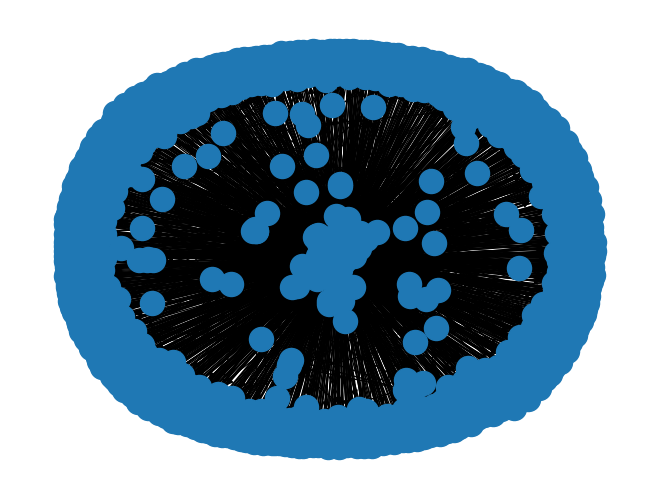

In [26]:
network = nx.read_graphml('CKCC_kiara_network.graphml')
nx.draw(network)

Finally we can check out the lineage for our final export output. As we can see, it has stored all the decisions we have made, and the ways in which they have created 'new' datasets, right from our original import.

In [27]:
%%capture
! pip install observable_jupyter

In [28]:
from kiara_plugin.dh_tagung_2023.utils import augment_lineage_data

In [29]:
augmented_nodes = augment_lineage_data(output['export_details'],kiara)

In [30]:
from observable_jupyter import embed

In [31]:
embed('@dharpa-project/kiara-data-lineage', cells=['displayViz', 'style'], inputs={'dataset':augmented_nodes, 'modulesNodes':12, 'valueNodes':8, 'Width': 250, 'Height': 500})

<h2>Recommended Reading</h2>
<br>Want to know more about Network Analysis? Here's some helpful tutorials and reading:

* <a href="https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python"><i>Programming Historian</i> NetworkX tutorial</a>
* Ahnert, Ruth, Ahnert, Sebastian E., Coleman, Catherine Nicole and Scott B. Weingart 2020. <i>The Network Turn: The Changing Perspectives in the Humanities</i>. Cambridge: Cambridge University Press. https://doi.org/10.1017/9781108866804
* Barabási, Albert-László. <i>Linked: The New Science of Networks</i>. New York: Penguin Group, 2002.
* Borgatti, Stephen. ‘The Key Player Problem.’ In <i>Dynamic Social Network Modeling and Analysis: Workshop Summary and Papers</i>. Edited by Ronald Breiger, Kathleen Carley and Philippa Pattison. Washington: The National Acadamies Press, 2003. 241-252.
* Brughmans, Tom, Anna Collar, and Fiona Coward, ed. <i>The Connected Past: Challenges to Network Studies in Archaeology and History</i>. Oxford: Oxford University Press, 2016.
* Tuominen, Jouni, Koho, Mikko, Pikkanen, Ilona, Drobac, Senka, Enqvist, Johanna, Hyvönen, Eero, La Mela, Matti, Leskinen, Petri, Paloposki, Hanna-Leena and Rantala, Heikki. Constellations of Correspondence: a Linked Data Service and Portal for Studying Large and Small Networks of Epistolary Exchange in the Grand Duchy of Finland. DHNB 2022 The 6th Digital Humanities in Nordic and Baltic Countries Conference, pp. 415-423, CEUR Workshop Proceedings, Vol. 3232, March, 2022. http://ceur-ws.org/Vol-3232/paper41.pdf